# Predicting Indonesian Population

## Import modules

In [ ]:
# Base Modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ARIMA
from statsmodels.tsa.arima_model import ARIMA

# Errir rate
from sklearn.metrics import mean_squared_error

# Additions
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Problem

Forecast Indonesian Population

In [ ]:
data = pd.read_csv('penduduk.csv')

In [ ]:
data.head()

,Tahun,Tanggal,Pertumbuhan
0,1960,1960-12-31,87751066
1,1961,1961-12-31,90098396
2,1962,1962-12-31,92518373
3,1963,1963-12-31,95015295
4,1964,1964-12-31,97596728


## Use Specific Columns Only

In [ ]:
df = data[['Tahun', 'Pertumbuhan']]

In [ ]:
df.head()

,Tahun,Pertumbuhan
0,1960,87751066
1,1961,90098396
2,1962,92518373
3,1963,95015295
4,1964,97596728


## Convert Year so It Can be Used

In [ ]:
df['Tahun'] = df['Tahun'].astype(str) + '-01-01'
df['Tahun'] = pd.to_datetime(df['Tahun'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tahun        61 non-null     datetime64[ns]
 1   Pertumbuhan  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [ ]:
df.head()

,Tahun,Pertumbuhan
0,1960-01-01,87751066
1,1961-01-01,90098396
2,1962-01-01,92518373
3,1963-01-01,95015295
4,1964-01-01,97596728


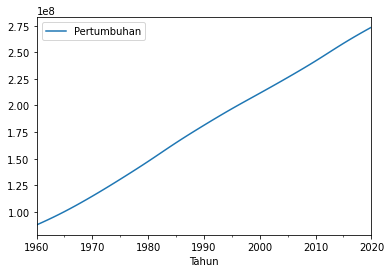

In [ ]:
df.plot(x='Tahun', y='Pertumbuhan')
plt.show()

## Split data

In [ ]:
X_train = df[df['Tahun'] < '2016-01-01']
X_valid = df[df['Tahun'] >= '2008-01-01']

print("X_train Shape", X_train.shape)
print("X_valid Shape", X_valid.shape)

X_train Shape (56, 2)
X_valid Shape (13, 2)


In [ ]:
tahun = X_train[['Tahun', 'Pertumbuhan']]
tahun_v = X_valid[['Tahun', 'Pertumbuhan']]

In [ ]:
tahun.set_index('Tahun', inplace=True)
tahun_v.set_index('Tahun', inplace=True)

In [ ]:
index_50_years = pd.date_range(tahun_v.index[-1], freq='AS', periods=50)

In [ ]:
index_50_years

DatetimeIndex(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01',
               '2024-01-01', '2025-01-01', '2026-01-01', '2027-01-01',
               '2028-01-01', '2029-01-01', '2030-01-01', '2031-01-01',
               '2032-01-01', '2033-01-01', '2034-01-01', '2035-01-01',
               '2036-01-01', '2037-01-01', '2038-01-01', '2039-01-01',
               '2040-01-01', '2041-01-01', '2042-01-01', '2043-01-01',
               '2044-01-01', '2045-01-01', '2046-01-01', '2047-01-01',
               '2048-01-01', '2049-01-01', '2050-01-01', '2051-01-01',
               '2052-01-01', '2053-01-01', '2054-01-01', '2055-01-01',
               '2056-01-01', '2057-01-01', '2058-01-01', '2059-01-01',
               '2060-01-01', '2061-01-01', '2062-01-01', '2063-01-01',
               '2064-01-01', '2065-01-01', '2066-01-01', '2067-01-01',
               '2068-01-01', '2069-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

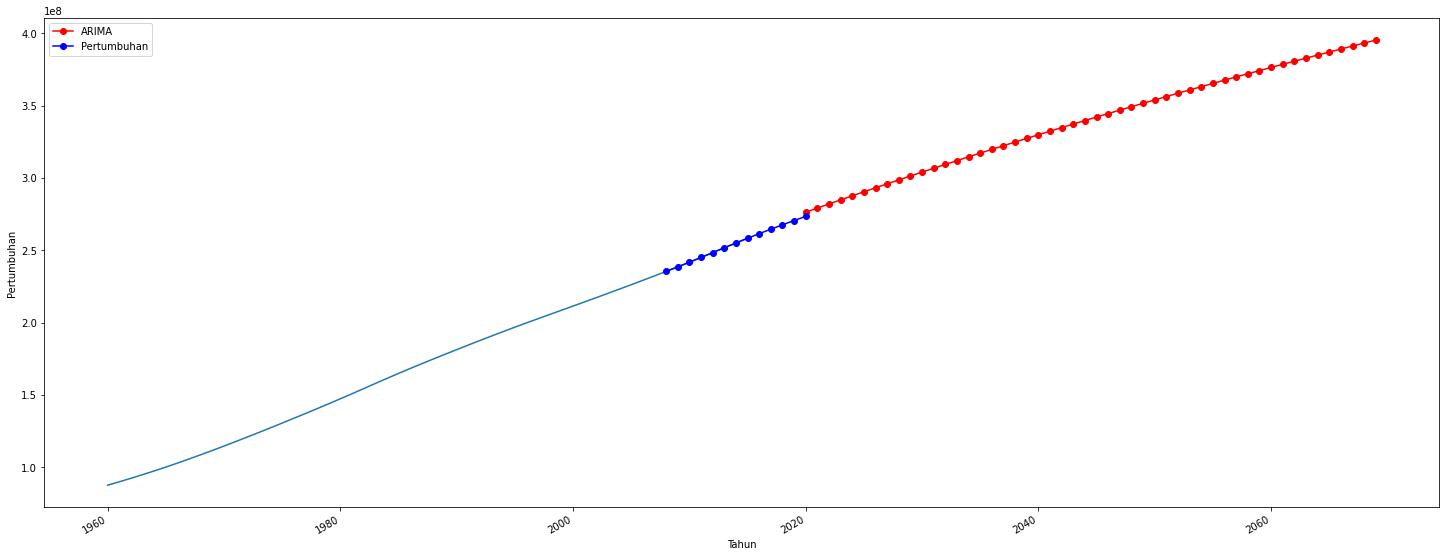

In [ ]:
model_arima = ARIMA(tahun_v, order=(2,0,0))
model_arima_fit = model_arima.fit(disp=-1)

forecast = model_arima_fit.forecast(50)[0]

# Passing the same index for the forecasting
forecast = pd.Series(forecast, index=index_50_years)
forecast = forecast.rename("ARIMA")

# Plotting
fig, ax = plt.subplots(figsize=(25,10))
chart = sns.lineplot(x='Tahun', y='Pertumbuhan', data=tahun)
forecast.plot(ax=ax, color='red', marker='o', legend=True)
tahun_v.plot(ax=ax, color='blue', marker='o', legend=True)
plt.show()

## Concat the Result

In [ ]:
df.shape

(61, 2)

In [ ]:
df_fcast = forecast.to_frame()

In [ ]:
df_fcast.shape

(50, 1)

In [ ]:
df.head()

,Tahun,Pertumbuhan
0,1960-01-01,87751066
1,1961-01-01,90098396
2,1962-01-01,92518373
3,1963-01-01,95015295
4,1964-01-01,97596728


In [ ]:
df.set_index("Tahun", inplace=True)

In [ ]:
df_fcast.head()

,ARIMA
2020-01-01,2.764014e+08
2021-01-01,2.792591e+08
2022-01-01,2.820969e+08
2023-01-01,2.849148e+08
2024-01-01,2.877130e+08


In [ ]:
df_fcast.rename(columns=({"ARIMA":"Pertumbuhan"}), inplace=True)

In [ ]:
output_df = pd.DataFrame()

In [ ]:
output_df = pd.concat([df, df_fcast], axis=0)

In [ ]:
output_df.head()

,Pertumbuhan
1960-01-01,87751066.0
1961-01-01,90098396.0
1962-01-01,92518373.0
1963-01-01,95015295.0
1964-01-01,97596728.0


In [ ]:
output_df.rename_axis("Tahun", inplace=True)

In [ ]:
output_df.tail()

,Pertumbuhan
Tahun,
2065-01-01,3.870762e+08
2066-01-01,3.891607e+08
2067-01-01,3.912307e+08
2068-01-01,3.932862e+08
2069-01-01,3.953273e+08


In [ ]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 1960-01-01 to 2069-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pertumbuhan  111 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [ ]:
output_df

,Pertumbuhan
Tahun,
1960-01-01,8.775107e+07
1961-01-01,9.009840e+07
1962-01-01,9.251837e+07
1963-01-01,9.501530e+07
1964-01-01,9.759673e+07
...,...
2065-01-01,3.870762e+08
2066-01-01,3.891607e+08
2067-01-01,3.912307e+08


In [ ]:
output_df.reset_index(inplace=True)

In [ ]:
output_df.head()

,Tahun,Pertumbuhan
0,1960-01-01,87751066.0
1,1961-01-01,90098396.0
2,1962-01-01,92518373.0
3,1963-01-01,95015295.0
4,1964-01-01,97596728.0


In [ ]:
output_df['Tahun'] = output_df['Tahun'].dt.strftime("%Y")

In [ ]:
output_df.set_index("Tahun", inplace=True)

In [ ]:
output_df.to_csv("Pertumbuhan_50_Tahun.csv")